#Introduction

Problem: How do you recognize or classify an image in traditional boolean programming?

**Artificial Neural Networks** are the primitive framework for machine learning models that have an input layer, output layer, and a series of hidden layers. Refer to 3Blue1Brown video for introductory information.


**Why use CNNs instead of ANNs?**

Imagine if you are using an ANN but your input is an image with pixels = its height * width. So for an image of only 28 by 28 pixels you would need to have 784 neurons to
represent the information, and that is only for grayscale images, if you had colored (RGB) images you would need three times that much data. So for one neuron in the first layer of a ANN would have
to have 784 weights. 

By needing large ANNs for image inputs we increase the computational time and resources while increasing the likelyhood of overfitting.

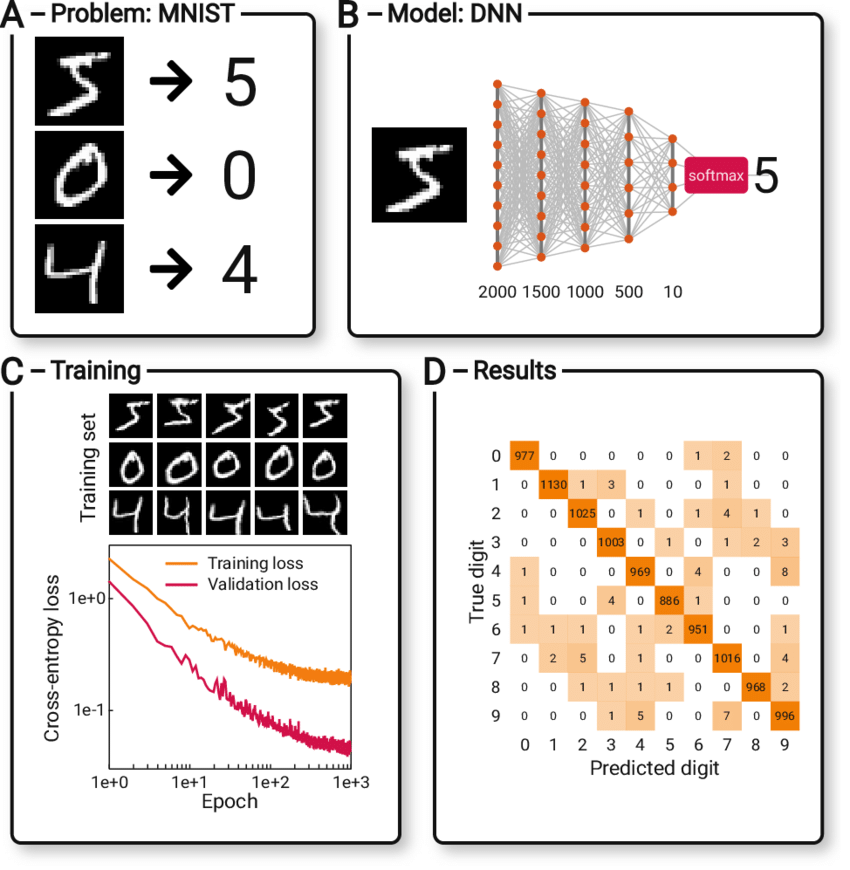



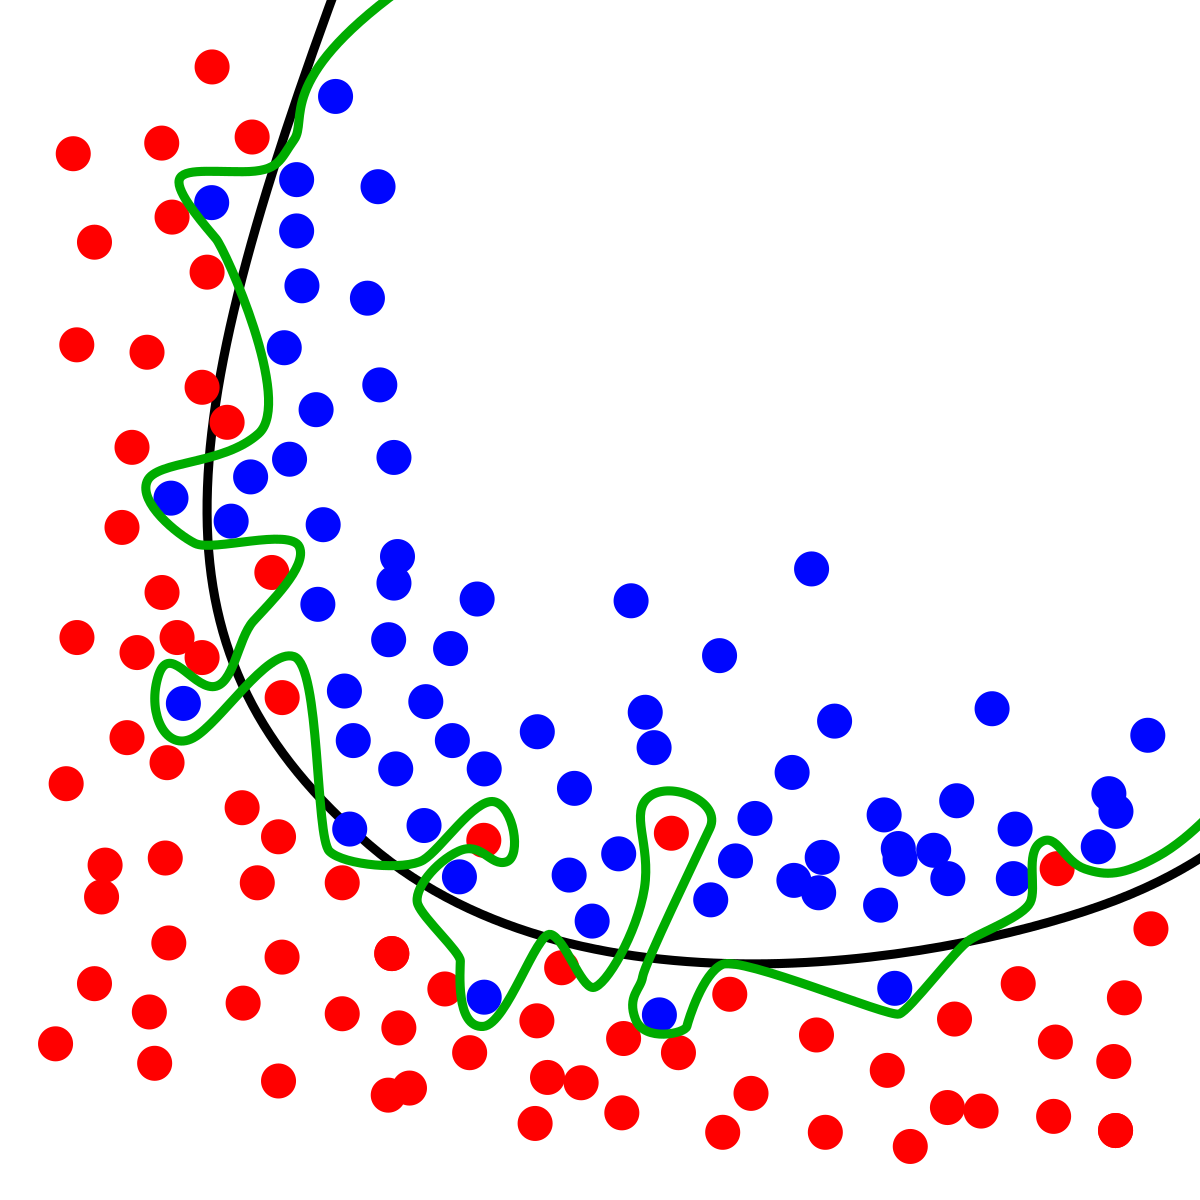

In general, the structure of CNNs confrom to this setup:



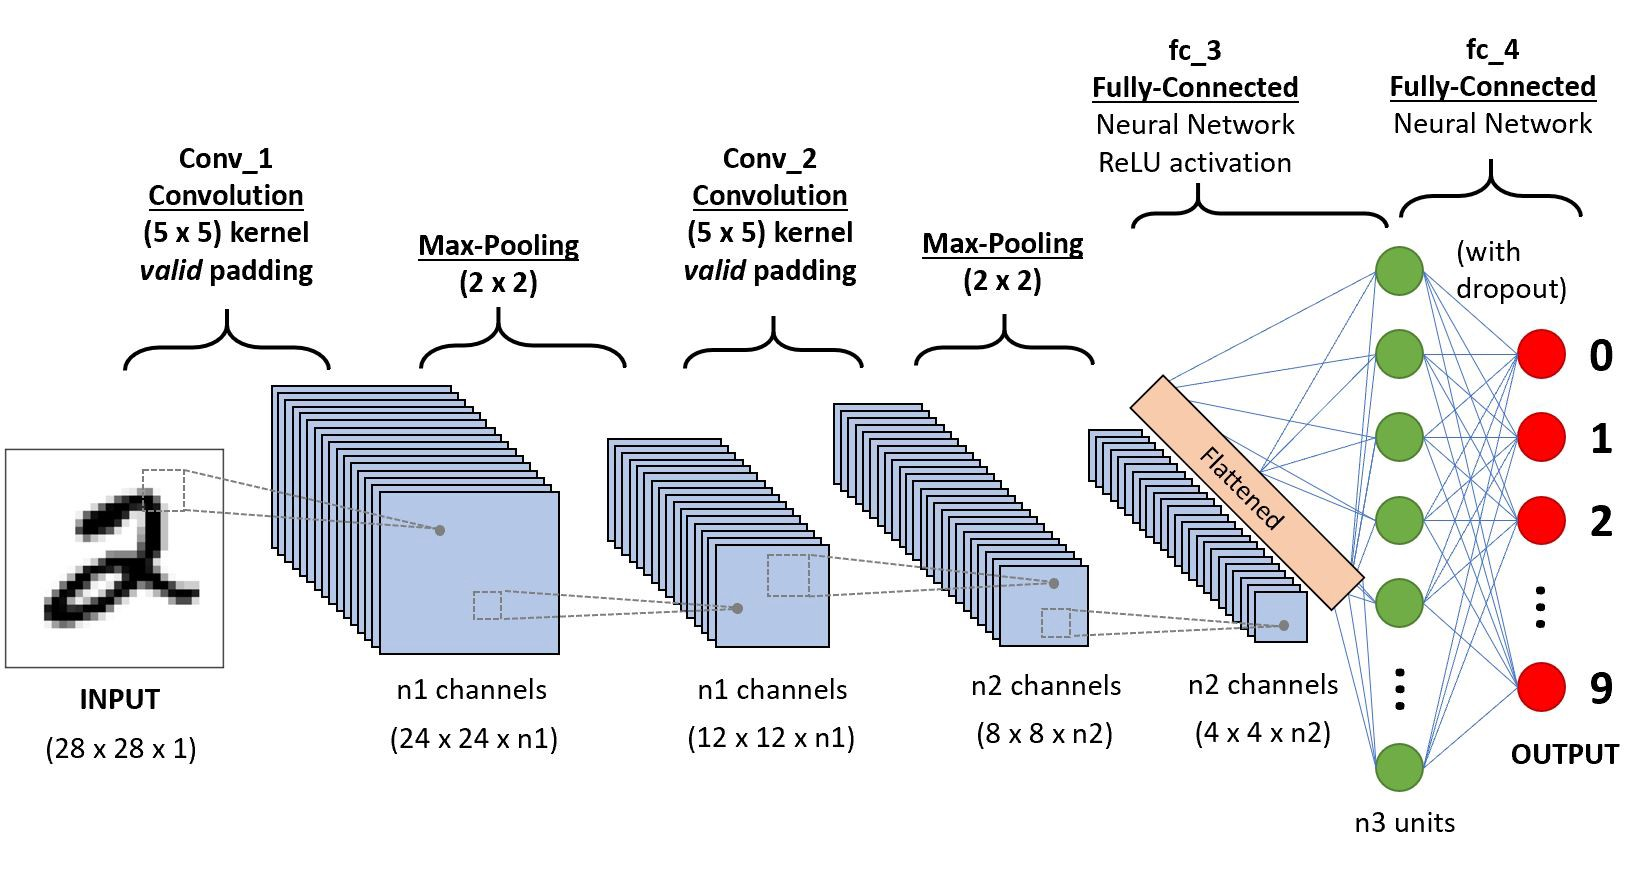

Several convolutional layers, followed by pooling layers, after which the data is flattened and fit into a fully connected convolutionl neural network.

#Convolution and Relu 

We use convolutions to extract important features of the data while reducing the size of the input image. 

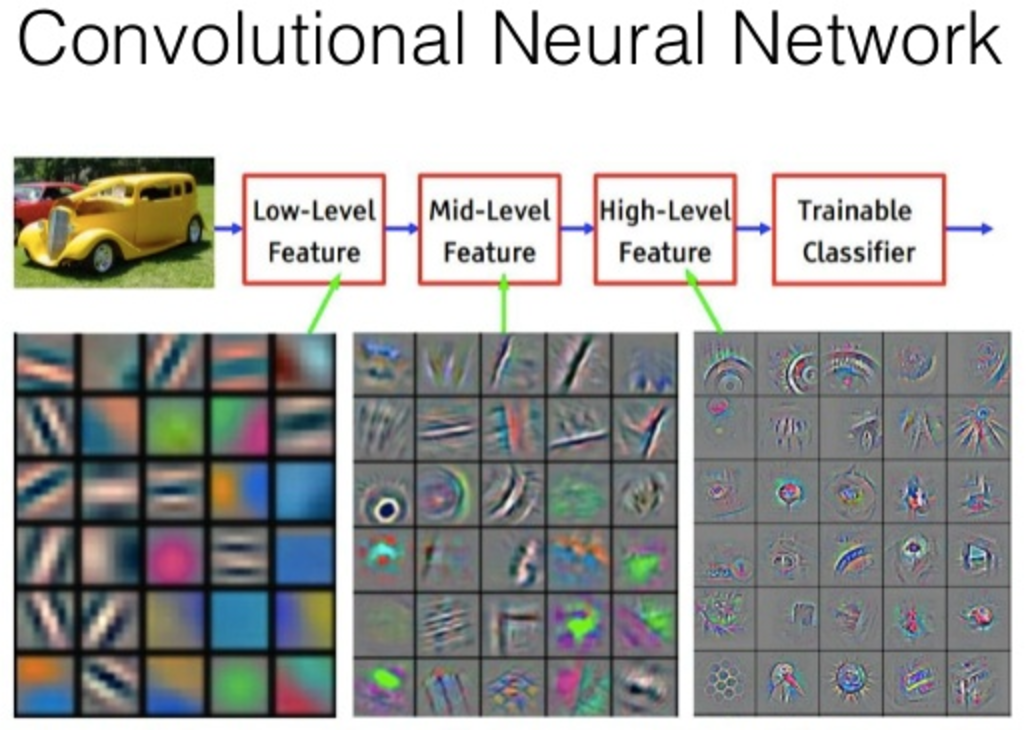

Convolution apply's a filter through each part of the image and performs scalar product between the filter and that part of the image to get a scalar value to reduce the dimensionality of the image while retaining important edges. 



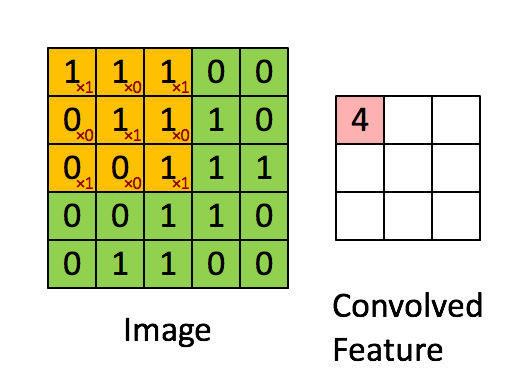

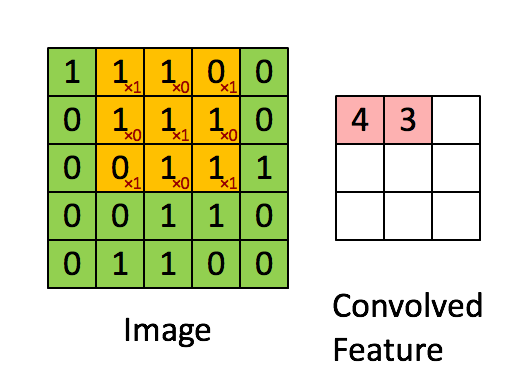

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
from keras.datasets import mnist as my_dataset
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
from skimage.measure import block_reduce
from scipy.signal import convolve2d

def convolve_each_channel(im, m):
  im = im.copy()  
  for i in range(3):
    im[..., i] = convolve2d(im[..., i], m, mode = 'same')
  return im

def convolve_anad_merge(im, m):
  return convolve_each_channel(im, m).sum(axis = -1)

def convolve_anad_merge(im, m):
  return convolve_each_channel(im, m).sum(axis = -1)
import imageio as iio


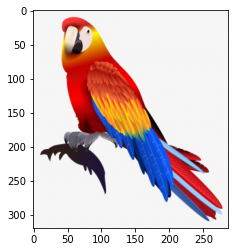

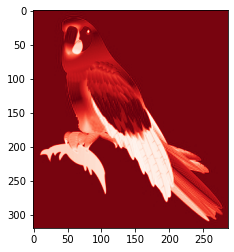

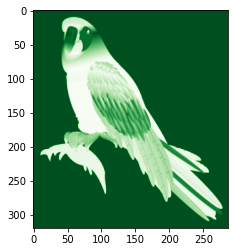

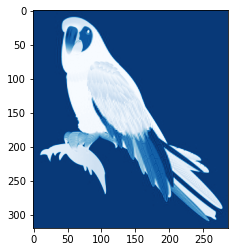

In [4]:
im = iio.imread('https://p.kindpng.com/picc/s/708-7087587_vector-parrot-colored-vector-parrot-png-transparent-png.png')/255.
plt.imshow(im)
plt.show()
plt.imshow(im[:,:, 0],cmap='Reds')
plt.show()
plt.imshow(im[:,:, 1],cmap='Greens')
plt.show()
plt.imshow(im[:,:, 2],cmap='Blues')
plt.show()

In [5]:
print(im)

[[[0.97254902 0.97254902 0.97254902]
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  ...
  [0.96862745 0.96862745 0.96862745]
  [0.96862745 0.96862745 0.96862745]
  [0.97254902 0.97254902 0.97254902]]

 [[0.96862745 0.96862745 0.96862745]
  [0.96470588 0.96470588 0.96470588]
  [0.96470588 0.96470588 0.96470588]
  ...
  [0.96470588 0.96470588 0.96470588]
  [0.96470588 0.96470588 0.96470588]
  [0.96862745 0.96862745 0.96862745]]

 [[0.96862745 0.96862745 0.96862745]
  [0.96470588 0.96470588 0.96470588]
  [0.96470588 0.96470588 0.96470588]
  ...
  [0.96470588 0.96470588 0.96470588]
  [0.96470588 0.96470588 0.96470588]
  [0.96862745 0.96862745 0.96862745]]

 ...

 [[0.96862745 0.96862745 0.96862745]
  [0.96470588 0.96470588 0.96470588]
  [0.96470588 0.96470588 0.96470588]
  ...
  [0.96470588 0.96470588 0.96470588]
  [0.96470588 0.96470588 0.96470588]
  [0.96862745 0.96862745 0.96862745]]

 [[0.96862745 0.96862745 0.96862745]
  [0.96470588 0.96470588 0.96470588]


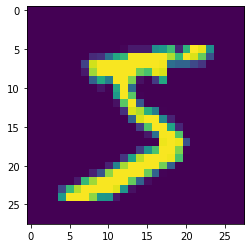

In [6]:
plt.imshow(x_train[0])


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:

edge_detection = np.array([[1,1,1],
                          [1,-100,1],
                          [1,1,1]]) 
'''

edge_detection = np.array([[-1,-1],
                           [1, 1]])
'''


blur_size = 10
m_blur = np.ones((blur_size,blur_size))/blur_size**2
x_train[0].shape

(28, 28)

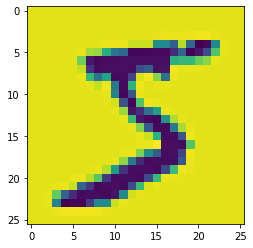

In [9]:
#We can have full, valid, or same
im2 = convolve2d(x_train[0], edge_detection,mode='valid')
plt.imshow(im2)
plt.show()

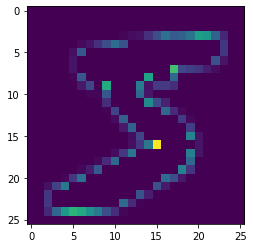

(26, 26)

In [10]:
#Relu is an activation function that takes the output from the previous layer and performs an elementwise operation to pass in an activation/input into the next layer 
im3=im2
im3[im3<0] = 0
im3.shape
plt.imshow(im3)
plt.show()
im3.shape

In [11]:
im3

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    3,
          21,   39,   54,  162,  280,  437,  337,  367,  447,  668,  629,
         374,  127,    0,    0],
       [   0,    0,    0,    0,    0,    0,   30,   66,  160,  284,  421,
         295,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  191,    0,    0],
       [   0,    0,    0,    0,    0,   49,  317,    0,    0,    0,    0,
           0,    0,  

#Pooling

Pooling aims to reduce the dimensionality by downsampling an input so that there are less overall parameters. (think of this as both shrinking the amount of data that is passed through the following layers while preserving the most important features of the data.)

**Average Pooling**
This type of pooling runs a filter over the image and returns the average value within the filter. 

**Max Pooling**
This type of pooling runs a filter over the image and returns the highest pixel value within the filter

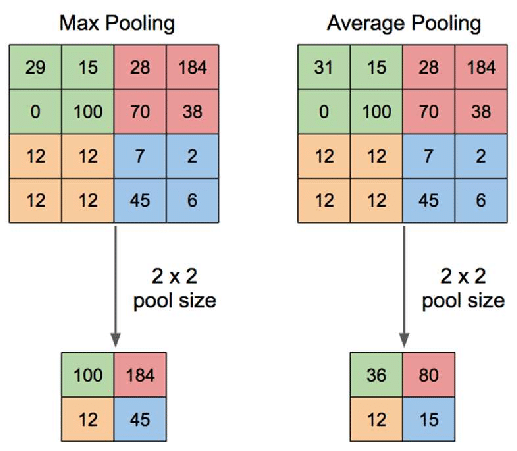

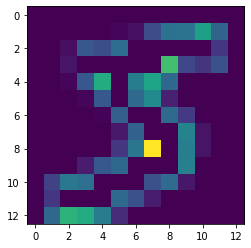

(13, 13)

In [12]:
#Pooling
import skimage.measure
im4=skimage.measure.block_reduce(im3, (2,2), np.max)
plt.imshow(im4)
plt.show()
im4.shape

#FC Neural Network

**Fully connected NN**
Is a neural network architecture where all of the nodes in a layer are connected to all of the other nodes in the previous layer.

Essentially the convolutional layers are providing a meaningful, low-dimensional, and somewhat invariant feature space, and the fully-connected layer is learning a (possibly non-linear) function in that space.






**Why use softmax activation function in the end?**

If we have n number of classes we want the last layer of the FC NN to have n nodes which use the softmax activation function to give a probability distribution across all of the classes, from which we select the highest value to get the most likely predicted label. So for example since the number 9 and 8 are more similar than 9 and 1 we would expect the 'likelyhood' value of 8 to be relatively high when our input is 9 and and the 'likelyhood' of 1 relatively low.

https://ai-digit.web.app/

#Implementation and visualization

In [13]:
im5=im4.flatten()
im5

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   21,   54,  280,  437,
        447,  668,  374,    0,    0,    0,   49,  317,  284,  421,    0,
          0,    0,    0,    0,  191,    0,    0,    0,   67,    0,    0,
          0,    0,    0,  821,  257,  177,  298,    0,    0,    0,   18,
        317,  723,    0,  498,  681,  395,    0,    0,    0,    0,    0,
          0,    0,   14,  319,    0,  403,  565,  109,    0,    0,    0,
          0,    0,    0,    0,    0,   11,  357,    0,    0,  405,  202,
          0,    0,    0,    0,    0,    0,    0,    0,   81,  366,    0,
          0,  527,   64,    0,    0,    0,    0,    0,    0,    0,  187,
        462, 1176,    0,  502,   66,    0,    0,    0,    0,    0,   89,
        326,  398,    0,    0,    0,  510,    2,    0,    0,    0,  227,
        471,  431,    0,    0,    0,  290,  413,   78,    0,    0,    0,
          0,  191,    0,    0,    0,  404,  295,   

The following code is taken from https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8 which we will use to visualize what the forward pass of a CNN does when given an input image after the weights of the model are tuned 

1/1 [==============================] - 0s 18ms/step
6	

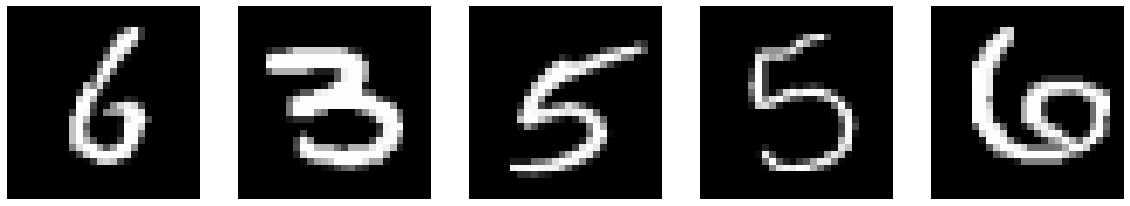

In [14]:
# Visualize Intermediate Activations 
import pandas as pd
import os
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split

num_classes=10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#onehot encoding
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

def model():
    
    inputs = Input(shape=(28,28,1))
    x = Conv2D(24,kernel_size=(3,3),padding='same',activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)

    output = Dense(num_classes, activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model


y_train_cat.shape

epochs = 1
batch_size=256

model = model()
history = model.fit(X_train,y_train_cat,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=(X_test,y_test_cat))
figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(X_test[i+50,:,:],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

layer_outputs = [layer.output for layer in model.layers[1:7]]


activation_model = Model(inputs=model.input,outputs=layer_outputs)

In [15]:
input

<bound method Kernel.raw_input of <google.colab._kernel.Kernel object at 0x7f4cf4865be0>>

(-0.5, 27.5, 27.5, -0.5)

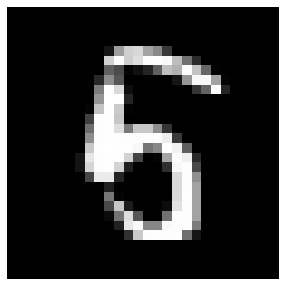

In [16]:
#change index for different numbers 
import random
number = 5

list_of_indexes = np.where(y_test==number)
index = np.random.choice(list_of_indexes[0], 1)
img = X_test[index].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

1/1 [==============================] - 0s 70ms/step


<ipython-input-17-77f27eb7783c>:17: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


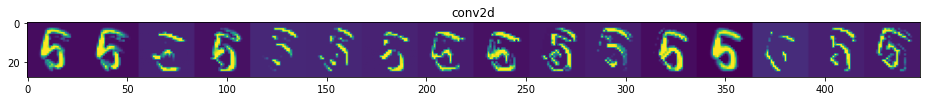

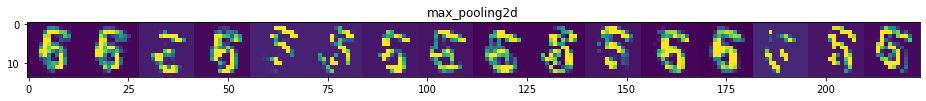

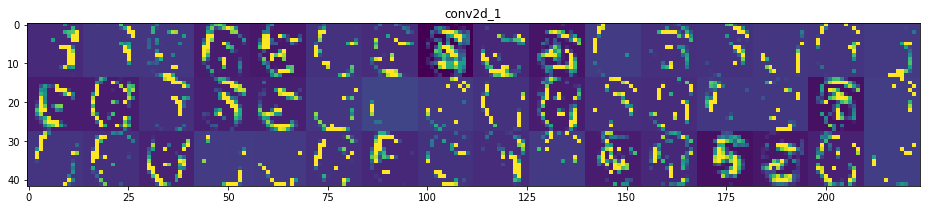

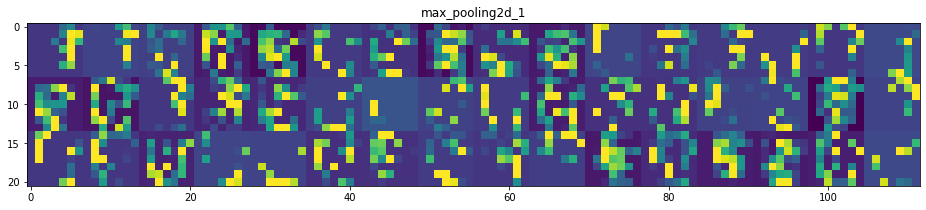

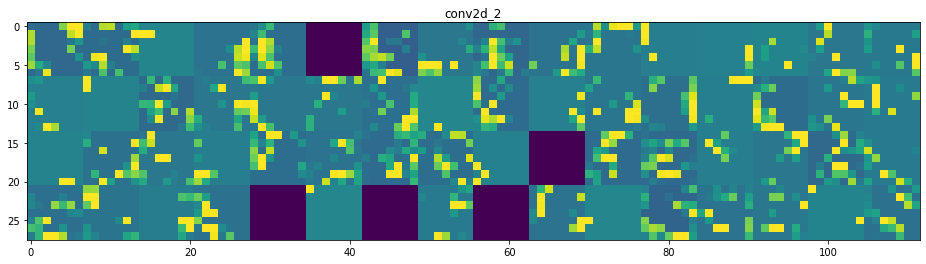

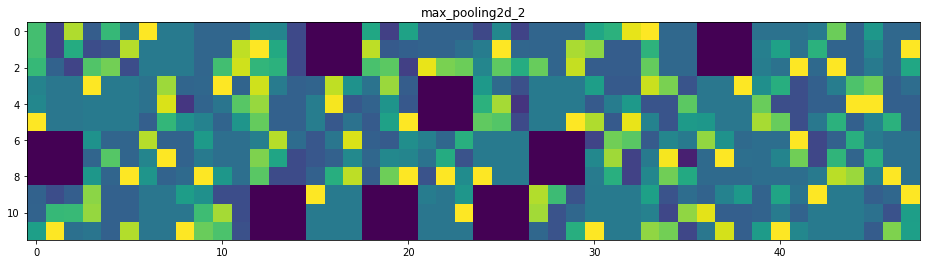

In [17]:
activations = activation_model.predict(img)

layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

(-0.5, 27.5, 27.5, -0.5)

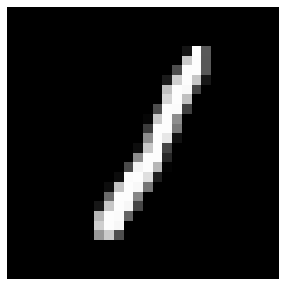

In [18]:
#change index for different numbers to visualize what the model does for a given number 
import random
number = 1

list_of_indexes = np.where(y_test==number)
index = np.random.choice(list_of_indexes[0], 1)
img = X_test[index].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

1/1 [==============================] - 0s 16ms/step


<ipython-input-19-77f27eb7783c>:17: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


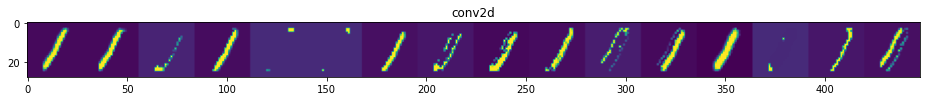

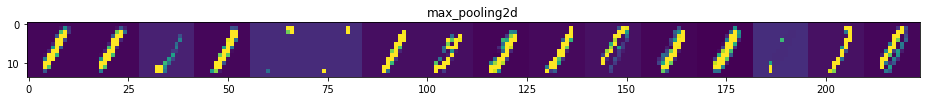

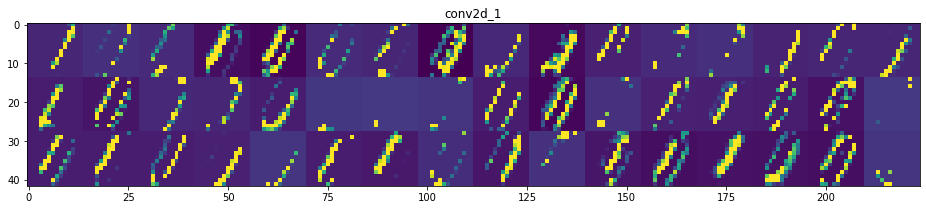

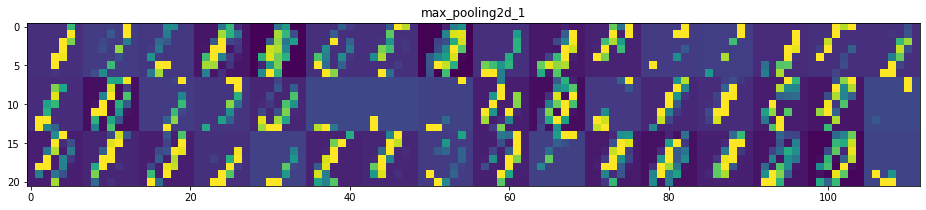

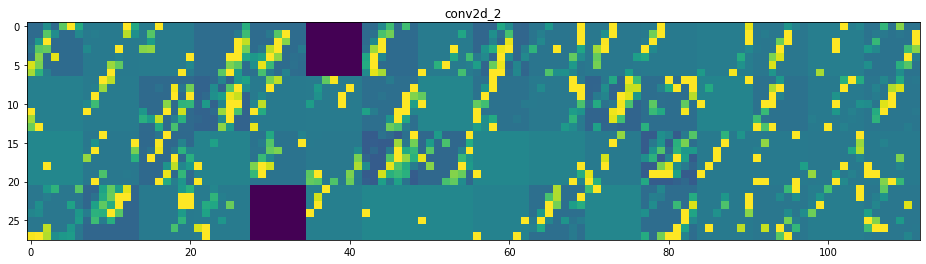

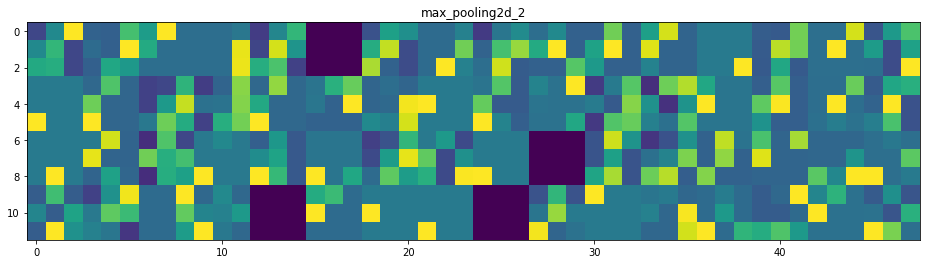

In [19]:
activations = activation_model.predict(img)

layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [20]:
# create our model/network
model = keras.models.Sequential()

model.add(keras.Input(shape=(28, 28, 1)))

model.add(keras.layers.Conv2D(filters = 10, kernel_size = (2,2), 
                              activation = 'relu', use_bias = False, 
                              padding = 'same'))

model.add(keras.layers.MaxPool2D(pool_size = (1,1)))

model.add(keras.layers.Conv2D(filters = 1, kernel_size = (2,2), 
                              activation = 'relu', use_bias = False, 
                             padding = 'same'))

model.add(keras.layers.MaxPool2D(pool_size = (1,1)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(10, activation='softmax', use_bias=False))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

y_train_cat.shape
history = model.fit(X_train, y_train_cat, epochs = 3, validation_data = (X_test, y_test_cat))

#y_predicted_proba = model.predict(X_test)
#y_predicted_labels = np.argmax(y_predicted_proba, axis = 1)
#acc = np.mean(y_predicted_labels == y_test)
#print(f'test accuracy: {acc}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 10)        40        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 10)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         40        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 1)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7

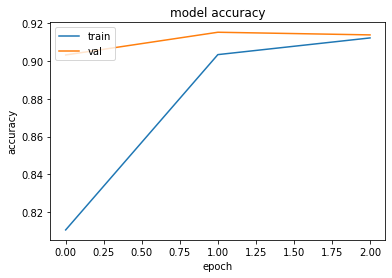

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

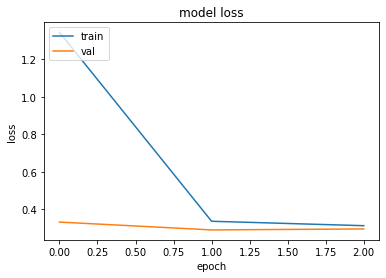

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()